## Exercise 2
- load: ../data/weight-height.csv
- inspect it
- plot it using a scatter plot with Weight as a function of Height
- plot the male and female populations with 2 different colors on a new scatter plot
- remember to label the axes

In [1]:
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

import pandas as pd

In [2]:
df = pd.read_csv('../../data/weight-height.csv')

In [3]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
Gender    10000 non-null object
Height    10000 non-null float64
Weight    10000 non-null float64
dtypes: float64(2), object(1)
memory usage: 234.5+ KB


,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [4]:
# permite saber la cantidad de elementos por columna
df['Gender'].value_counts()

Male      5000
Female    5000
Name: Gender, dtype: int64

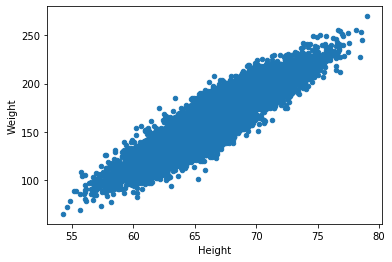

In [5]:
# graficamos solamente dos columnas
df.plot(kind='scatter', x='Height', y='Weight')

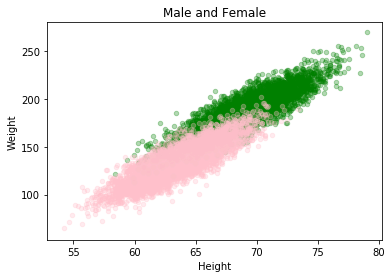

In [6]:
# recuperamos lo valores de la columna "Male" en un nuevo datafram
male = df.query('Gender == "Male"')

# recuperamos los valores de la columna "Female" en un nuevo dataframe
female = df.query('Gender == "Female"')

# armamos los subplots
fig, ax = plt.subplots()

# graficamos
male.plot(kind='scatter', x='Height', y='Weight', ax=ax, color='green', alpha=0.3)
female.plot(kind='scatter', x='Height', y='Weight', ax=ax, color='pink', alpha=0.3, title='Male and Female')

In [7]:
# otra solución posible es generar una nueva columna dentro del dataframe existente
df['GenderColor'] = df['Gender'].map({'Male': 'blue', 'Female': 'red'})
df.head()

,Gender,Height,Weight,GenderColor
0,Male,73.847017,241.893563,blue
1,Male,68.781904,162.310473,blue
2,Male,74.110105,212.740856,blue
3,Male,71.730978,220.042470,blue
4,Male,69.881796,206.349801,blue


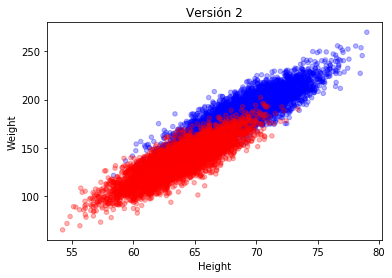

In [8]:
df.plot(kind='scatter', x='Height', y='Weight', c=df['GenderColor'], alpha=0.3, title='Versión 2')

# Exercise 3
- plot the histogram of the heights for males and for females on the same plot
- use alpha to control transparency in the plot comand
- plot a vertical line at the mean of each population using plt.axvline()

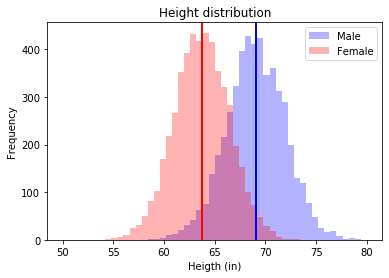

In [9]:
male['Height'].plot(kind='hist',
                     bins=50,
                     range=(50, 80),
                     alpha=0.3,
                     color='blue')

female['Height'].plot(kind='hist',
                       bins=50,
                       range=(50, 80),
                       alpha=0.3,
                       color='red')

# agregamos algunos datos al gráfico
plt.title('Height distribution')
plt.legend(["Male", "Female"])
plt.xlabel("Heigth (in)")

# para crear las líneas verticales
plt.axvline(male['Height'].mean(), color='blue', linewidth=2)
plt.axvline(female['Height'].mean(), color='red', linewidth=2)

## Exercise 4
- plot the weights of the males and females using a box plot
- which one is easier to read?
- (remember to put in titles, axes and legends)

In [10]:
# usaremos una tabla pivot
dfpvt = df.pivot(columns  = 'Gender', values = 'Weight')
dfpvt.head()

Gender,Female,Male
0,NaN,241.893563
1,NaN,162.310473
2,NaN,212.740856
3,NaN,220.042470
4,NaN,206.349801


Text(0, 0.5, 'weight(lbs)')

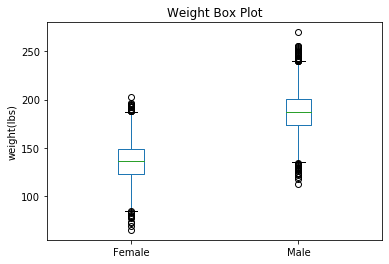

In [11]:
# graficamos
dfpvt.plot(kind='box')
plt.title('Weight Box Plot')
plt.ylabel('weight(lbs)')

# Exercise 5
- load the dataset: `../data/titanic-train.csv`
- learn about scattermatrix here: http://pandas.pydata.org/pandas-docs/stable/visualization.html
- display the data using a scattermatrix

In [13]:
df_titanic = pd.read_csv('../../data/titanic-train.csv')
df_titanic.info()
df_titanic.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [17]:
from pandas.plotting import scatter_matrix

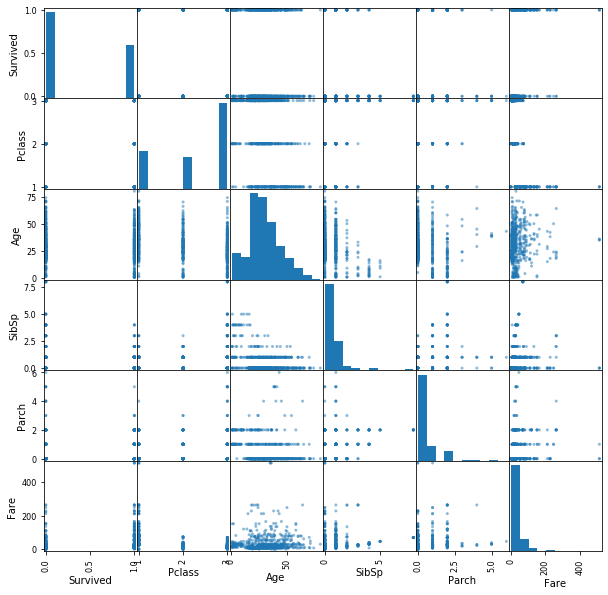

In [20]:
# gráfico de matriz, nos permite comparar todas las columnas
_ = scatter_matrix(df_titanic.drop('PassengerId', axis=1), figsize=(10,10))